<a href="https://colab.research.google.com/github/Olivia-Feldman/DLStockPrectionCNNModel-/blob/Jack/get_and_label_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Install yfinance and googlefinance
!pip install yfinance
!pip3 install git+https://github.com/pdevty/googlefinance-client-python.git

  Cloning https://github.com/pdevty/googlefinance-client-python.git to /tmp/pip-req-build-behkuwi7
  Running command git clone -q https://github.com/pdevty/googlefinance-client-python.git /tmp/pip-req-build-behkuwi7
     |████████████████████████████████| 61kB 2.5MB/s 
     |████████████████████████████████| 245kB 6.3MB/s 
  Created wheel for googlefinance.client: filename=googlefinance.client-1.3.1-cp36-none-any.whl size=4296 sha256=8248bafb4cda6897cffb8793e357fdb1d8f2b3de753eef590184b17f4322e3f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-req4ll95/wheels/19/c9/a9/ddbb6543f61ab423f0533a932f6e7a41545e04b955bc492515
Successfully built googlefinance.client


In [63]:
# IMPORT YAHOO/GOOGLE FINANCE DATA - Functions
# Source: https://medium.com/@jouneidraza522/yahoo-finance-api-to-get-stocks-tickers-data-in-python-c49820249a18
# Source: https://pypi.org/project/googlefinance/

# Imports
from pandas_datareader import data as pdr
from datetime import date as dt # FIX: only import date
import yfinance as yf 
yf.pdr_override()
import pandas as pd
from googlefinance.get import get_datum
from googlefinance.get import get_code
import json

# Define saveData function
def saveData(df, name):
  df.to_csv(name + '.csv')

# Define readCSVData function
def readCSVData (ticker, tag):
  df = pd.read_csv(ticker + '_' + tag + '.csv')
  print(df.head())
  return df

# Define getYahooFinanceData function
def getYahooFinanceData(files, ticker, start_date, end_date, tag):
  # Save to files list
  data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
  dataName = ticker + '_' + tag
  files.append(dataName)

  # Save data to file
  saveData(data, dataName)

# Define getGoogleFinanceData function
def getGoogleFinanceData(files, ticker, name, tag):
  data = get_datum(ticker, period='4Y', interval=86400)
  print(data)
  dataName = name + '_' + tag
  files.append(dataName)

  # Save data to file
  saveData(data, dataName)

In [ ]:
data = get_datum('NASDAQ:TSLA', period='1Y', interval=86400)
print(data)

In [57]:
# IMPORT YAHOO/GOOGLE FINANCE DATA - Executions

# Yahoo Finance

# Tickerlist
tick_list = ['DJIA'] # Ticker list

today = dt.today() # Get today's date

# Choose start and sotp dates
start_date = "2017-01-01"
end_date = "2020-12-31"

# Initialize files list
files = []

counter = 0
for tick in tick_list:
  getYahooFinanceData(files, tick_list[counter], start_date, end_date, 'test')
  #readCSVData(tick_list[counter], 'test')
  counter += 1

# Google Finance
tick_list_2 = ['NASDAQ:TSLA', 'NASDAQ: AMZN']
tick_list_2_names = ['TSLA', 'AMZN']

counter = 0
for tick in tick_list:
  getGoogleFinanceData(files, tick_list_2[counter], tick_list_2_names[counter], 'test2')
  #readCSVData(tick_list_2_names[counter], 'test2')
  counter += 1

[*********************100%***********************]  1 of 1 completed


In [55]:
# VISUALIZE FINANCE DATA - Functions

# Source: https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python#:~:text=Use%20pandas.,read%20from%20the%20CSV%20file.
# Source: https://datatofish.com/line-chart-python-matplotlib/

# Imports
import matplotlib.pyplot as plt

# Create line graph
def createLineGraph(tick, tag, x_col, y_col):
  col = [x_col, y_col]
  df = pd.read_csv(tick+'_'+tag+'.csv')
  dx = df[x_col]
  dy = df[y_col]
  plt.plot(dx, dy)
  plt.title(y_col + ' VS ' + x_col)
  plt.xlabel(x_col)
  plt.ylabel(y_col)

In [ ]:
@

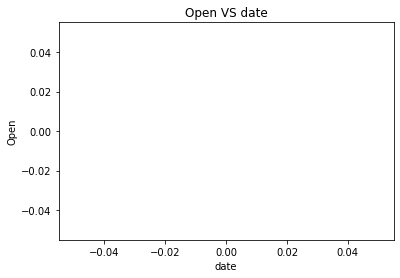

In [56]:
# VISUALIZE FINANCE DATA - Executions

createLineGraph('TSLA', 'test2', "date", "Open")